# Logistische Regression Projekt - Aufgaben
In diesem Projekt werden wir mit Fake-Daten zu Werbung arbeiten, die aufzeigen, ob ein Nutzer auf eine Werbeanzeige auf einer Webseite einer Firma geklickt hat oder nicht. Wir werden versuchen ein Modell zu erstellen, das anhand von Nutzereigenschaften vorhersagt, ob dieser auf die Werbung klicken wird oder nicht.

Der Datensatz beinhaltet folgende Eigenschaften:

- 'Daily Time Spent on Site': Zeit auf der Webseite in Minuten
- 'Age': Alter in Jahren
- 'Area Income': Durchschnittliches Einkommen der Region des Nutzers
- 'Daily Internet Usage': Durchschnittliche Minutenzahl die der Nutzer 
- täglich im Internet ist
- 'Ad Topic Line': Überschrift der Werbung
- 'City': Stadt des Nutzers
- 'Male': Ob der Nutzer männlich ist (1) oder nicht (0)
- 'Country': Land des Nutzers
- 'Timestamp': Zeit zu der der Nutzer auf die Werbung geklickt oder das Fenster geschlossen hat
- 'Clicked on Ad': Ob der Nutzer gelickt hat (1) oder nicht (0)

> This exercise was first tryed out / played around with, without any recommended or best-case solution

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [23]:
train = pd.read_csv('Advertising.csv')

In [24]:
train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [25]:
train.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [34]:
train.info() # it was teached, that object should either be transformed, categorized or dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


<Axes: >

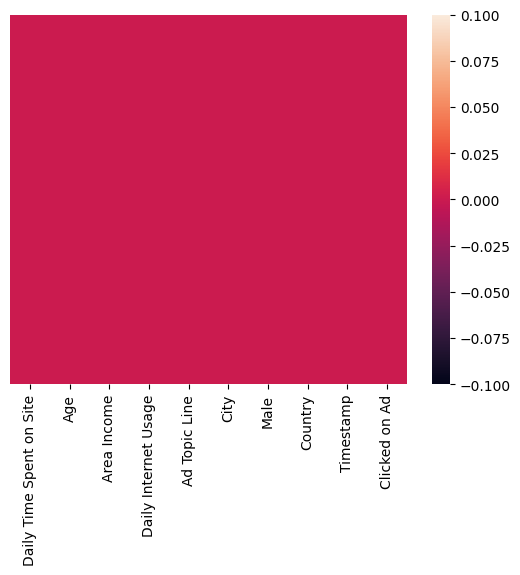

In [35]:
sns.heatmap(train.isnull(),yticklabels=False) # no nan values given

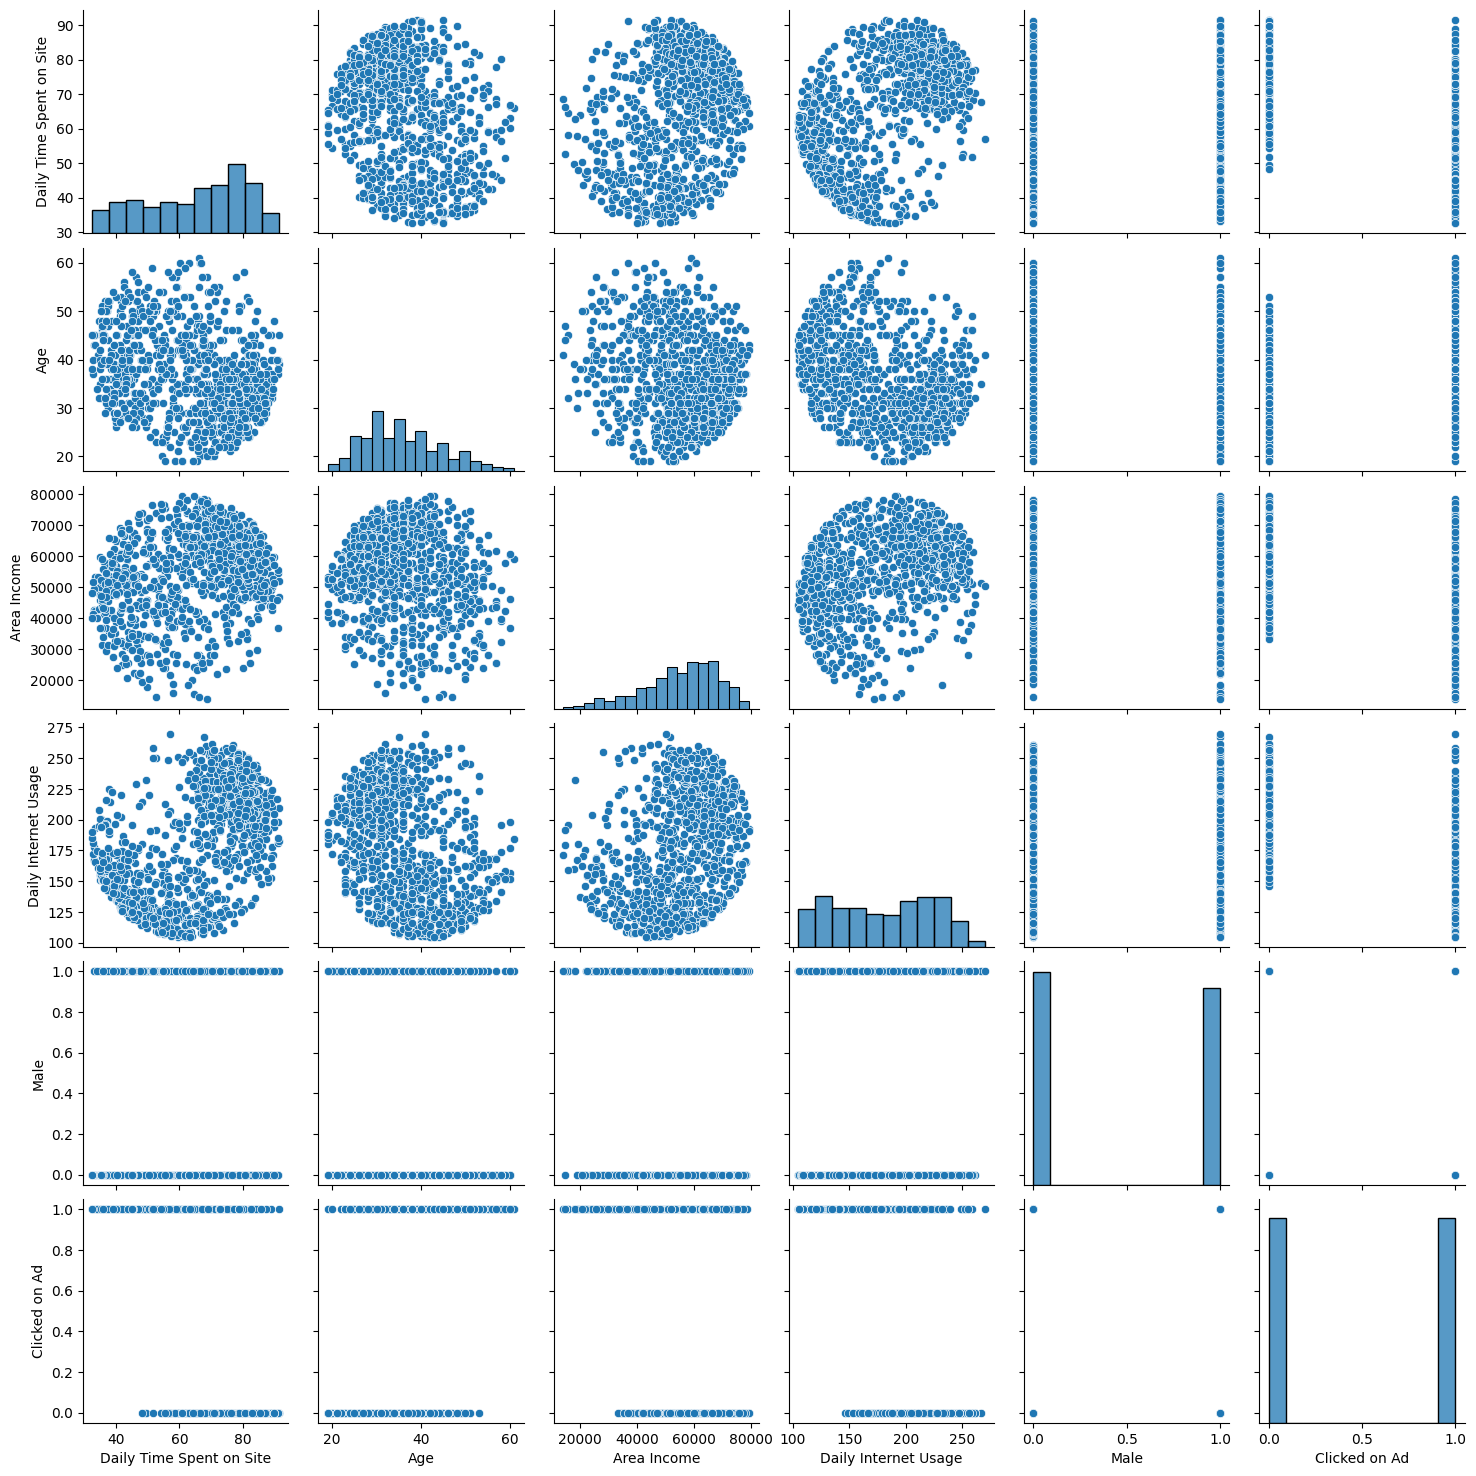

In [36]:
sns.pairplot(train)

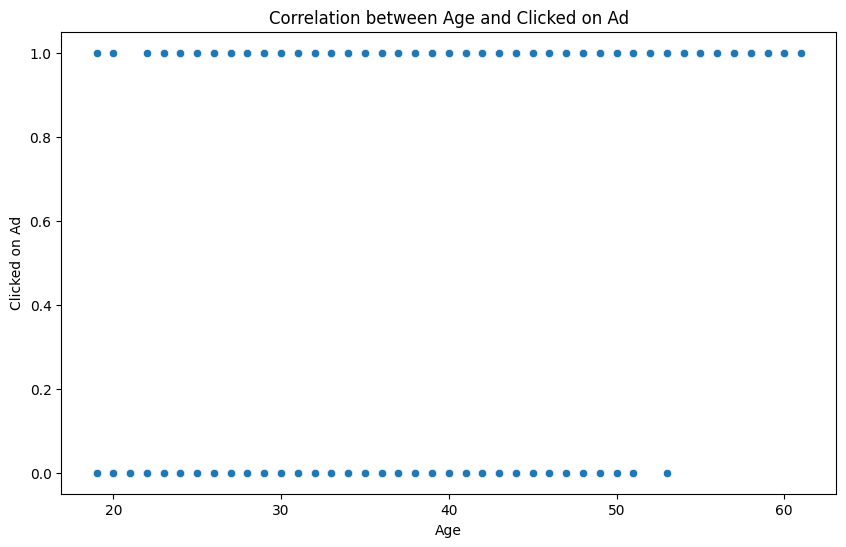

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Clicked on Ad', data=train)
plt.title('Correlation between Age and Clicked on Ad')
plt.xlabel('Age')
plt.ylabel('Clicked on Ad')
plt.show()

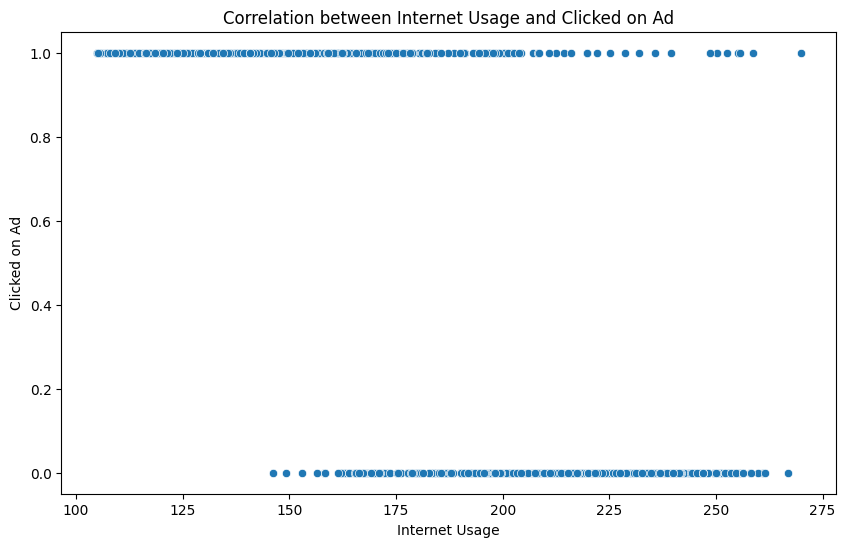

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily Internet Usage', y='Clicked on Ad', data=train)
plt.title('Correlation between Internet Usage and Clicked on Ad')
plt.xlabel('Internet Usage')
plt.ylabel('Clicked on Ad')
plt.show()

In [44]:
train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [45]:
train.columns # Train simple model first, therefor drop all object columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [47]:
train.info() #City, Add Topic Line, Country, Timestamp are object columns -> Drop them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [49]:
X = train.drop(columns=['City', 'Ad Topic Line', 'Country', 'Timestamp', 'Clicked on Ad']) 
y = train['Clicked on Ad']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.20, 
                                                    random_state=42)

In [53]:
X_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
29,76.02,22,46179.97,209.82,0
535,78.76,32,70012.83,208.02,1
695,73.49,38,67132.46,244.23,0
557,79.67,28,58576.12,226.79,0
836,49.21,46,49206.40,115.60,0


In [54]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [55]:
predictions = log_model.predict(X_test)
predictions

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1])

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        89
           1       0.95      0.95      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [57]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predictions)

array([[ 83,   6],
       [  5, 106]])